In [ ]:
import pandas as pd
import nltk
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
from collections import Counter
from wordcloud import WordCloud
from textwrap import wrap
# "git pull origin master" is how you update your local copy with the lastest copy in github

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock_df=pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/stock_data.csv')
movie_df=pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/movie_data.csv')
product_df=pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/product_data.csv')

In [ ]:
print(stock_df.head())
print(movie_df.head())
print(product_df.head())

                                                text  label
0                  I sold almost 2mil shares already     -1
1  (TO PREPARED PAY PENALTY OF 50 MILION TO STAR)...     -1
2  The ugly game just begin . Pnb boss in the board.     -1
3  Pang, u don't say people...u last also talk sh...     -1
4  Sorchai that missed the point dares to call pe...     -1
                                                text  label
0                          penggambaran lebih murah.     -1
1                                      一直以来最糟糕的事件之一。     -1
2  so for our pleasure , kita dapat 看到他们走路 , He's...      1
3                             There is no real plot.     -1
4  ia adalah satu perkara yang baik bahawa tiket ...     -1
                                                text  label
0                                     I'm satisfied.      1
1  pengalaman saya adalah dahsyat ..... ini adala...     -1
2  I have to be the first to review this product ...     -1
3           jadi saya membeli kira-kira 

#EDA



Stock

In [ ]:
stock_df.count()

text     693
label    693
dtype: int64

In [ ]:
# Check for missing values in the 'text' column
missing_text = stock_df['text'].isnull().sum()
print(f"Missing values in 'text' column: {missing_text}")

# Check for missing values in the 'label' column
missing_label = stock_df['label'].isnull().sum()
print(f"Missing values in 'label' column: {missing_label}")

Missing values in 'text' column: 0
Missing values in 'label' column: 0


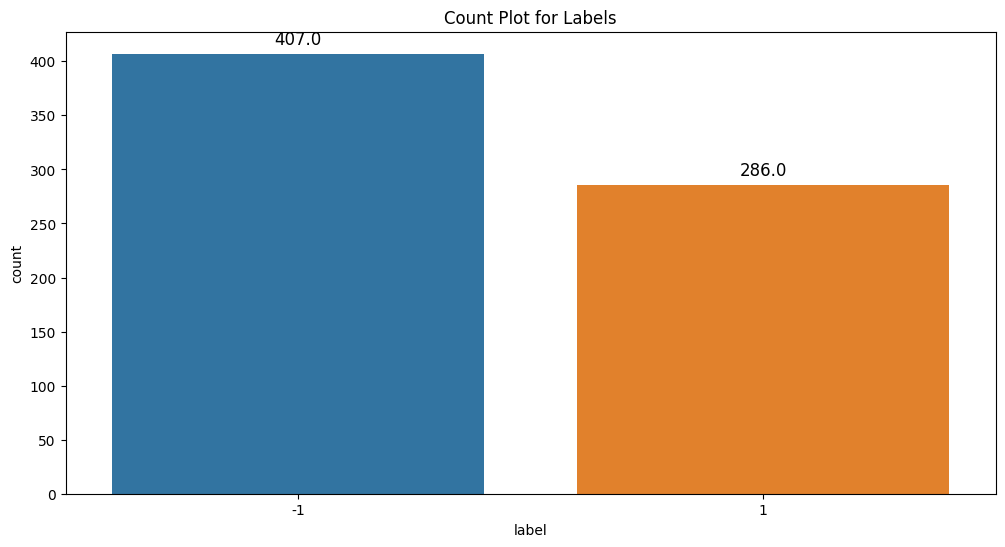

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=stock_df)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Count Plot for Labels')
plt.show()

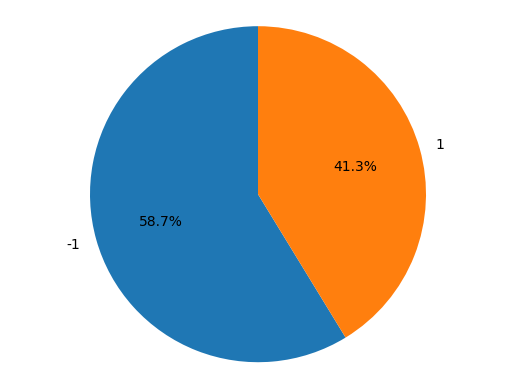

In [ ]:
# Assuming 'label' is a numerical variable with values 1 and -1
label_counts = stock_df['label'].value_counts()

labels = label_counts.index
sizes = label_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:
stock_df['temp_list'] = stock_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in stock_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,to,522
1,the,400
2,is,340
3,and,290
4,of,198
5,in,175
6,will,175
7,I,167
8,a,148
9,not,145


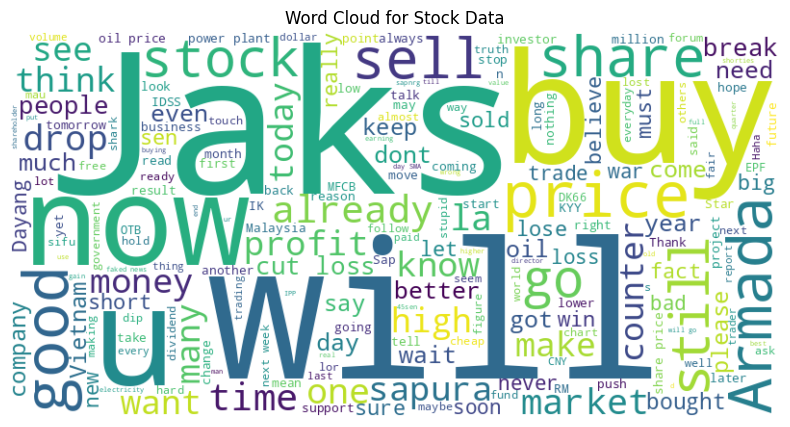

In [ ]:
# Combine all text data for the word cloud
text_data = ' '.join(stock_df['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Stock Data')
plt.show()


Movie

In [ ]:
movie_df.count()

text     699
label    699
dtype: int64

In [ ]:

# Check for missing values in the 'text' column
missing_text = movie_df['text'].isnull().sum()
print(f"Missing values in 'text' column: {missing_text}")

# Check for missing values in the 'label' column
missing_label = movie_df['label'].isnull().sum()
print(f"Missing values in 'label' column: {missing_label}")

Missing values in 'text' column: 0
Missing values in 'label' column: 0


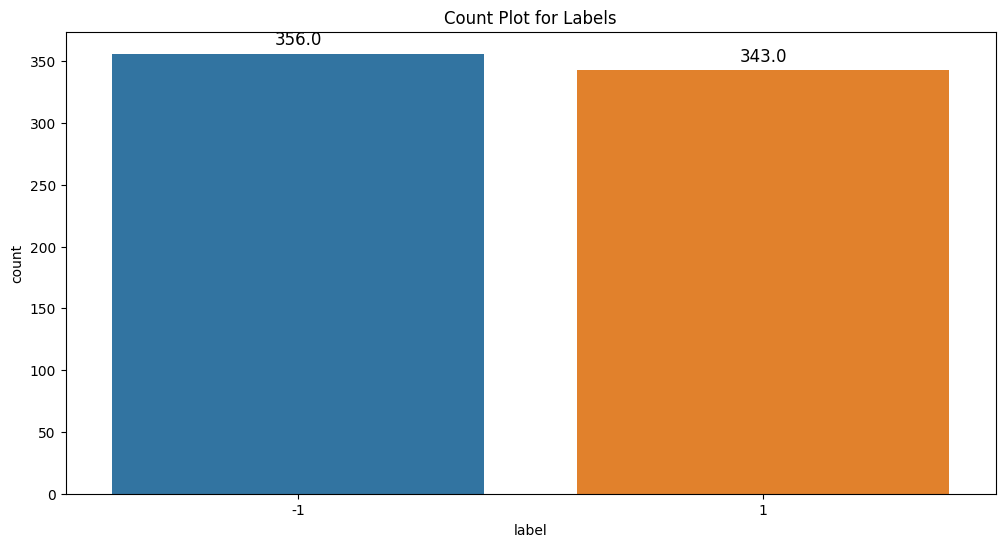

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=movie_df)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Count Plot for Labels')
plt.show()

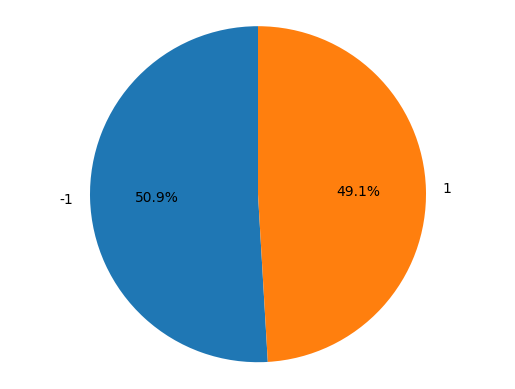

In [ ]:
# Assuming 'label' is a numerical variable with values 1 and -1
label_counts = movie_df['label'].value_counts()

labels = label_counts.index
sizes = label_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:
movie_df['temp_list'] = movie_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in movie_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
0,.,422
1,",",201
2,the,149
3,yang,135
4,is,130
5,a,115
6,and,96
7,movie,82
8,dan,79
9,of,76


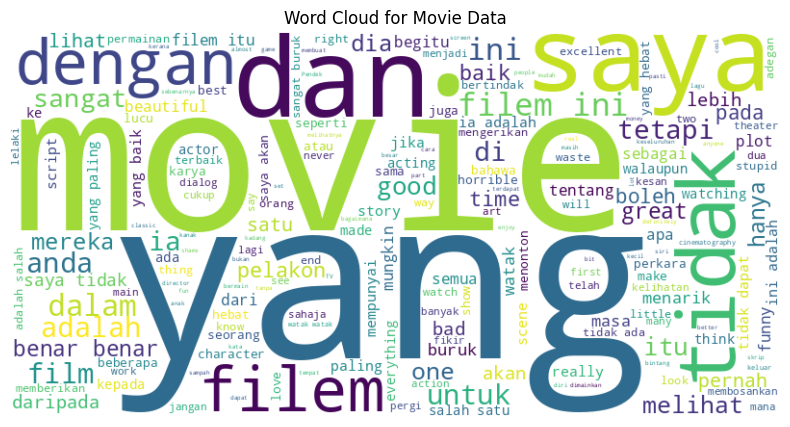

In [ ]:
# Combine all text data for the word cloud
text_data = ' '.join(movie_df['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Data')
plt.show()


Product

In [ ]:
product_df.count()

text     893
label    893
dtype: int64

In [ ]:
# Check for missing values in the 'text' column
missing_text = product_df['text'].isnull().sum()
print(f"Missing values in 'text' column: {missing_text}")

# Check for missing values in the 'label' column
missing_label = product_df['label'].isnull().sum()
print(f"Missing values in 'label' column: {missing_label}")

Missing values in 'text' column: 0
Missing values in 'label' column: 0


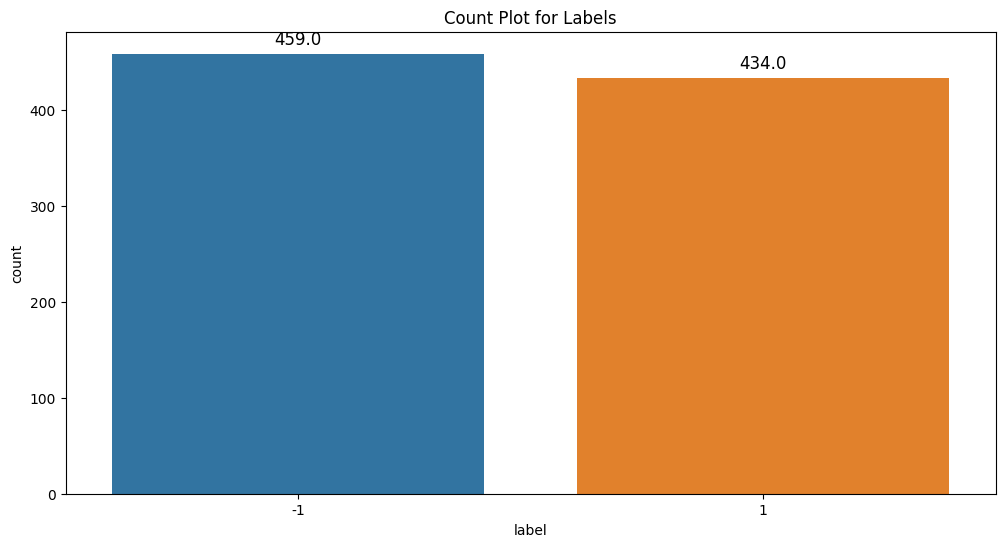

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=product_df)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Count Plot for Labels')
plt.show()

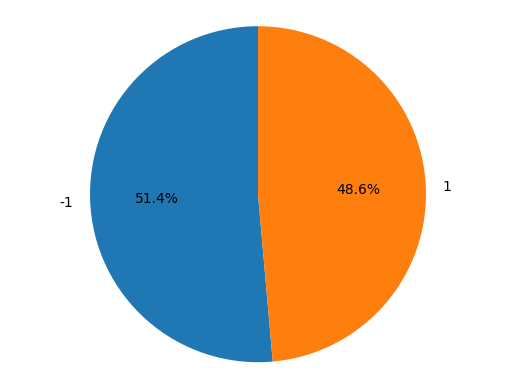

In [ ]:
# Assuming 'label' is a numerical variable with values 1 and -1
label_counts = product_df['label'].value_counts()

labels = label_counts.index
sizes = label_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()

In [ ]:
product_df['temp_list'] = product_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in product_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,.,542
1,",",153
2,saya,140
3,yang,133
4,the,127
5,I,118
6,a,115
7,and,107
8,is,106
9,!,104


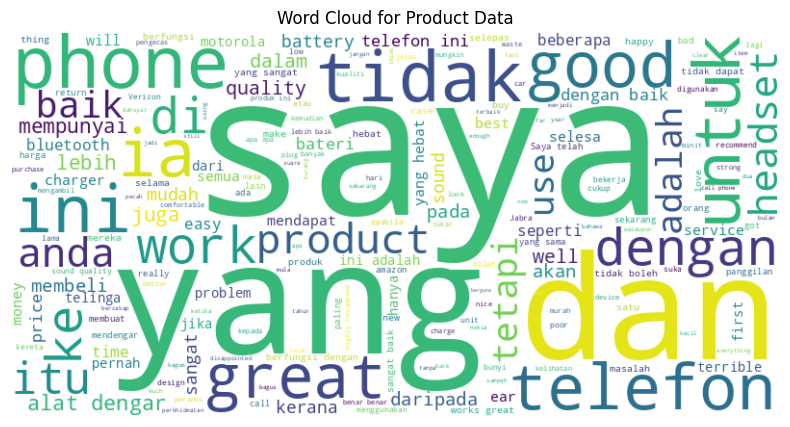

In [ ]:
# Combine all text data for the word cloud
text_data = ' '.join(product_df['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Data')
plt.show()


#Preprocessing

In [ ]:
import re
# Remove URLs from the text
stock_df['text'] = stock_df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
movie_df['text'] = movie_df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
product_df['text'] = product_df['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))

In [ ]:
#Convert to lowercase
stock_df['text'] = stock_df['text'].str.lower()
movie_df['text'] = movie_df['text'].str.lower()
product_df['text'] = product_df['text'].str.lower()

In [ ]:
#Removing punctuations
import string

# Get all the punctuations
punctuations = set(string.punctuation)

# Remove punctuations from the text except for hyphen and exclamation symbol
stock_df['text'] = stock_df['text'].apply(lambda x: ''.join(char for char in x if char not in punctuations or char == '-' or char == '!'))
movie_df['text'] = movie_df['text'].apply(lambda x: ''.join(char for char in x if char not in punctuations or char == '-' or char == '!'))
product_df['text'] = product_df['text'].apply(lambda x: ''.join(char for char in x if char not in punctuations or char == '-' or char == '!'))

In [ ]:
#Remove Irregular Spaces
stock_df['text'] = stock_df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
movie_df['text'] = movie_df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
product_df['text'] = product_df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
# Read the OOV dictionary from the text file
import ast

oov_dict = {}
with open('/content/drive/MyDrive/NLP/Sentiment Dataset/OOV Dictionary.txt', 'r') as file:
    for line in file:
        try:
            # Convert each line to a dictionary and merge it with the main dictionary
            line_dict = ast.literal_eval("{" + line.strip() + "}")
            oov_dict.update(line_dict)
        except (ValueError, SyntaxError):
            print(f"Skipping invalid line: {line.strip()}")

# Now oov_dict contains your slang to full-form mappings

# Function to replace slang words in the text
def replace_slang(text, oov_dict):
    return ' '.join([oov_dict[word] if word in oov_dict else word for word in text.split()])

# Apply it to your data
stock_df['text'] = stock_df['text'].apply(lambda x: replace_slang(x, oov_dict))
movie_df['text'] = movie_df['text'].apply(lambda x: replace_slang(x, oov_dict))
product_df['text'] = product_df['text'].apply(lambda x: replace_slang(x, oov_dict))


In [ ]:
#Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#English Stopwords
# Get the English stopwords
english_stopwords = stopwords.words('english')

# Remove stopwords from the text
# Replace 'brcc_df' with your DataFrame name
stock_df['text'] = stock_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
movie_df['text'] = movie_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
product_df['text'] = product_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

In [ ]:
mandarin_stopwords = stopwords.words('chinese')

# Remove stopwords from the text
stock_df['text'] = stock_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in mandarin_stopwords]))
movie_df['text'] = movie_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in mandarin_stopwords]))
product_df['text'] = product_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in mandarin_stopwords]))

In [ ]:
# Read Malay stopwords from a file
with open('/content/drive/MyDrive/NLP/Sentiment Dataset/stopwords-ms.txt', 'r', encoding='utf-8') as file:
    malay_stopwords = [line.strip() for line in file]

print(malay_stopwords)

# Remove stopwords from the text
stock_df['text'] = stock_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in malay_stopwords]))
movie_df['text'] = movie_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in malay_stopwords]))
product_df['text'] = product_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in malay_stopwords]))

['abdul', 'abdullah', 'acara', 'ada', 'adalah', 'ahmad', 'air', 'akan', 'akhbar', 'akhir', 'aktiviti', 'alam', 'amat', 'amerika', 'anak', 'anggota', 'antara', 'antarabangsa', 'apa', 'apabila', 'april', 'as', 'asas', 'asean', 'asia', 'asing', 'atas', 'atau', 'australia', 'awal', 'awam', 'bagaimanapun', 'bagi', 'bahagian', 'bahan', 'baharu', 'bahawa', 'baik', 'bandar', 'bank', 'banyak', 'barangan', 'baru', 'baru-baru', 'bawah', 'beberapa', 'bekas', 'beliau', 'belum', 'berada', 'berakhir', 'berbanding', 'berdasarkan', 'berharap', 'berikutan', 'berjaya', 'berjumlah', 'berkaitan', 'berkata', 'berkenaan', 'berlaku', 'bermula', 'bernama', 'bernilai', 'bersama', 'berubah', 'besar', 'bhd', 'bidang', 'bilion', 'bn', 'boleh', 'bukan', 'bulan', 'bursa', 'cadangan', 'china', 'dagangan', 'dalam', 'dan', 'dana', 'dapat', 'dari', 'daripada', 'dasar', 'datang', 'datuk', 'demikian', 'dengan', 'depan', 'derivatives', 'dewan', 'di', 'diadakan', 'dibuka', 'dicatatkan', 'dijangka', 'diniagakan', 'dis', 'dis

In [ ]:
#Chinese Word Segmentation
!pip install jieba
import jieba

# Segment Chinese words
stock_df['text'] = stock_df['text'].apply(lambda x: ' '.join(jieba.cut(x)))
movie_df['text'] = movie_df['text'].apply(lambda x: ' '.join(jieba.cut(x)))
product_df['text'] = product_df['text'].apply(lambda x: ' '.join(jieba.cut(x)))

In [ ]:
from collections import Counter

# Combine all text from the dataframes
all_text = ' '.join(stock_df['text'].tolist() + movie_df['text'].tolist() + product_df['text'].tolist())

# Split the text into tokens
tokens = all_text.split()

# Count the total number of tokens
total_tokens = len(tokens)

# Create a counter for the tokens to find unique vocabularies
vocab_counter = Counter(tokens)

# Count the number of unique vocabularies
unique_vocabs = len(vocab_counter)

print("Total number of tokens:", total_tokens)
print("Total number of unique vocabularies:", unique_vocabs)

# Split the text into words and count occurrences
word_counts = Counter(all_text.split())

# Find rare words (occurring only once)
rare_words = [word for word, count in word_counts.items() if count == 1]
print("Total number of rare words (n=1):", len(rare_words))

# Print the first 10 rare words
print(rare_words[:10])

Total number of tokens: 20913
Total number of unique vocabularies: 6885
Total number of rare words (n=1): 4319
['2mil', 'milion', 'nonsense', 'ugly', 'boss', 'peopleu', 'dares', 'sorchaigo', 'morebeside', 'dufube']


In [ ]:
def remove_rare_words(text, rare_words_set):
    return ' '.join([word for word in text.split() if word not in rare_words_set])

# Convert list of rare words to a set for faster lookups
rare_words_set = set(rare_words)

# Apply the function to each dataframe
stock_df['text'] = stock_df['text'].apply(lambda x: remove_rare_words(x, rare_words_set))
movie_df['text'] = movie_df['text'].apply(lambda x: remove_rare_words(x, rare_words_set))
product_df['text'] = product_df['text'].apply(lambda x: remove_rare_words(x, rare_words_set))

In [ ]:
# Adjusting labels from -1/1 to 0/1
label_map = {-1: 0, 1: 1}
stock_df['label'] = stock_df['label'].map(label_map)
movie_df['label'] = movie_df['label'].map(label_map)
product_df['label'] = product_df['label'].map(label_map)

In [ ]:
movie_df.head()

,text,label
0,penggambaran murah,0
1,一直 最 糟糕 的 之一 。,0
2,看到 playing !,1
3,real plot,0
4,marah,0


In [ ]:
# Remove instances where the 'text' column is empty
stock_df = stock_df[stock_df['text'].str.strip().astype(bool)]
movie_df = movie_df[movie_df['text'].str.strip().astype(bool)]
product_df = product_df[product_df['text'].str.strip().astype(bool)]

In [ ]:
# stock_df.to_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/stock_data_cleaned.csv',index=False)
# movie_df.to_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/movie_data_cleaned.csv',index=False)
# product_df.to_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/product_data_cleaned.csv',index=False)

#Train Test Spilt

In [ ]:
import pandas as pd

stock_df = pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/stock_data_cleaned.csv')
product_df = pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/product_data_cleaned.csv')
movie_df = pd.read_csv('/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/movie_data_cleaned.csv')

In [ ]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42
val_size_percentage = 15 / (100 - 15)  # Calculate the percentage of original data for validation to achieve a 70-15-15 split

#Stock Data Spilt
s_train_val_df, s_test_df = train_test_split(stock_df, test_size=0.15, random_state=random_seed) # First split: separate out the test dataset
s_train_df, s_val_df = train_test_split(s_train_val_df, test_size=val_size_percentage, random_state=random_seed) # Second split: separate out the validation dataset from the remaining data

#Product Data Spilt
p_train_val_df, p_test_df = train_test_split(product_df, test_size=0.15, random_state=random_seed)  # First split: separate out the test dataset
p_train_df, p_val_df = train_test_split(p_train_val_df, test_size=val_size_percentage, random_state=random_seed)  # Second split: separate out the validation dataset from the remaining data

#Movie Data Spilt
m_train_val_df, m_test_df = train_test_split(movie_df, test_size=0.15, random_state=random_seed)  # First split: separate out the test dataset
m_train_df, m_val_df = train_test_split(m_train_val_df, test_size=val_size_percentage, random_state=random_seed)  # Second split: separate out the validation dataset from the remaining data

In [ ]:
# Concatenating training sets
train_df = pd.concat([s_train_df, m_train_df, p_train_df], ignore_index=True)

# Concatenating validation sets
val_df = pd.concat([s_val_df, m_val_df, p_val_df], ignore_index=True)

# Concatenating test sets
test_df = pd.concat([s_test_df, m_test_df, p_test_df], ignore_index=True)

# Shuffle the datasets
train_df = train_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
val_df = val_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)

In [ ]:
# Check distribution of labels in each dataset (Check if one sentiment is overrepresented over the other)
print("Training Set Label Distribution:\n", train_df['label'].value_counts(normalize=True))
print("Validation Set Label Distribution:\n", val_df['label'].value_counts(normalize=True))
print("Test Set Label Distribution:\n", test_df['label'].value_counts(normalize=True))
# import matplotlib.pyplot as plt

# # Create a pie chart for the training set
# plt.pie(train_df['label'].value_counts(), labels=['Negative', 'Positive'])
# plt.title('Training Set Label Distribution')
# plt.show()

# # Create a pie chart for the validation set
# plt.pie(val_df['label'].value_counts(), labels=['Negative', 'Positive'])
# plt.title('Validation Set Label Distribution')
# plt.show()

# # Create a pie chart for the test set
# plt.pie(test_df['label'].value_counts(), labels=['Negative', 'Positive'])
# plt.title('Test Set Label Distribution')
# plt.show()

Training Set Label Distribution:
 0    0.542803
1    0.457197
Name: label, dtype: float64
Validation Set Label Distribution:
 0    0.511765
1    0.488235
Name: label, dtype: float64
Test Set Label Distribution:
 0    0.523529
1    0.476471
Name: label, dtype: float64


In [ ]:
# Define paths for the new files
combined_train_path = '/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/V3/combined_train_data.csv'
combined_val_path = '/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/V3/combined_val_data.csv'
combined_test_path = '/content/drive/MyDrive/NLP/BahasaRojakSA-RDSG1 (BYY)/Ready for XLMR Data spilts/V3/combined_test_data.csv'

# Save to CSV
train_df.to_csv(combined_train_path, index=False)
val_df.to_csv(combined_val_path, index=False)
test_df.to_csv(combined_test_path, index=False)